# Demo

> Visualization of generated Data

In [1]:
import matplotlib.pyplot as plt
import anndata as ad
import pandas as pd
import seaborn as sns
import numpy as np

from cytodatagen.utils.plotting import plot_marker_pairplot, plot_shared_tsne_grid
from pyhere import here

data_path = here("artifacts/demo/cytodata.h5ad")

In [2]:
# load data
cyto_adata = ad.read_h5ad(data_path)

# transform back to linear space
cofactor = 5
cyto_adata.X = np.arcsinh(cyto_adata.X / cofactor)

In [3]:
cyto_adata.obs.head()

,pop_name,pop_id,subject,sample_id,batch_id,batch_shift
cell_0_pop_1_sample_0,pop_1,0,control,0,2,2.235411
cell_1_pop_1_sample_0,pop_1,0,control,0,2,2.235411
cell_2_pop_1_sample_0,pop_1,0,control,0,2,2.235411
cell_3_pop_1_sample_0,pop_1,0,control,0,2,2.235411
cell_4_pop_1_sample_0,pop_1,0,control,0,2,2.235411


In [4]:
cyto_adata.X.shape

(200000, 5)

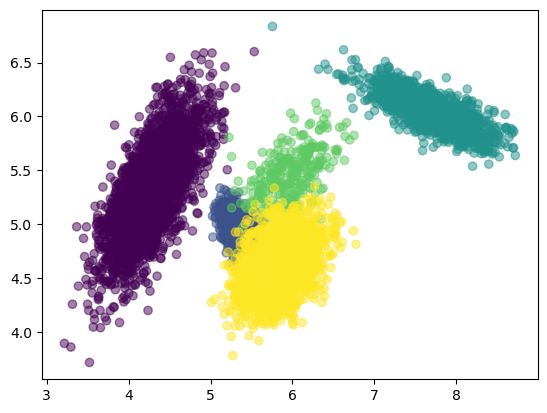

In [5]:
sample = cyto_adata[cyto_adata.obs["sample_id"] == 0]
ct_labels = sample.obs["pop_id"]

plt.scatter(sample.X[:, 1], sample.X[:, 0], c=ct_labels, alpha=0.5);

# Marker Distributions

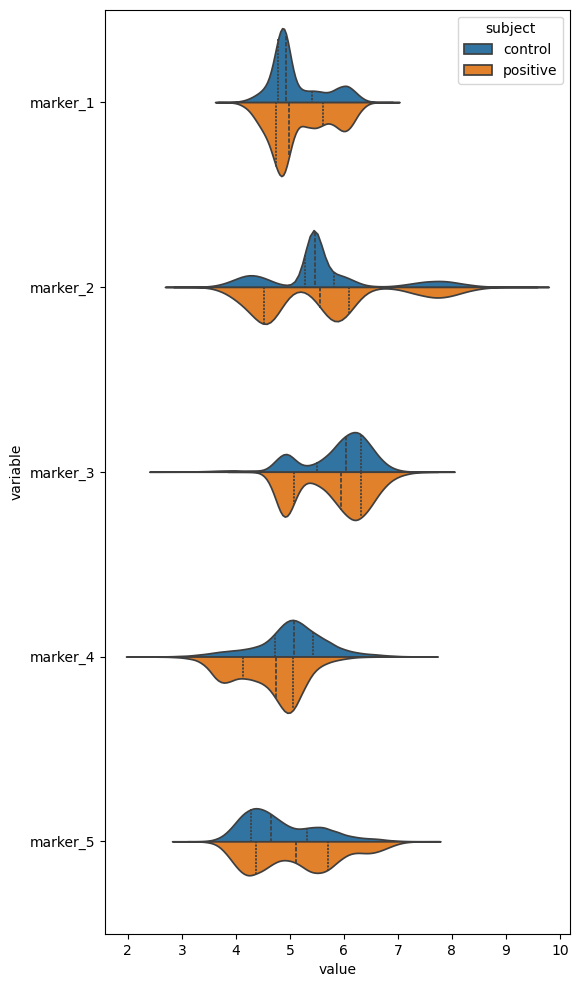

In [19]:
from cytodatagen.utils.adata import adata_to_df
import seaborn as sns
import pandas as pd

from cytodatagen.utils.plotting import plot_marker_dists


plot_marker_dists(cyto_adata)
plt.savefig(here("artifacts/figures/marker_dists.pdf"), bbox_inches="tight")

## Cell Type Distributions

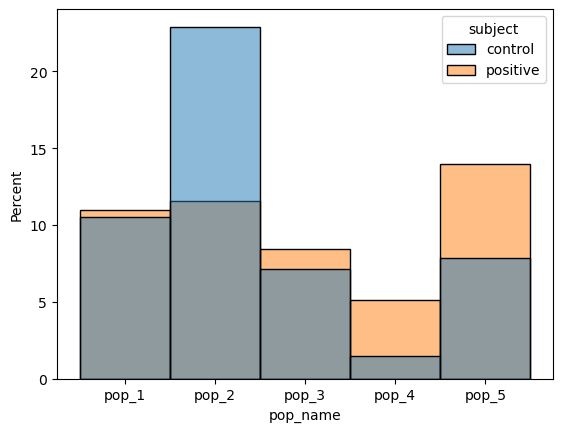

In [7]:
from cytodatagen.utils.plotting import plot_ct_dists

plot_ct_dists(cyto_adata)
plt.savefig(here("artifacts/figures/composition.png"))

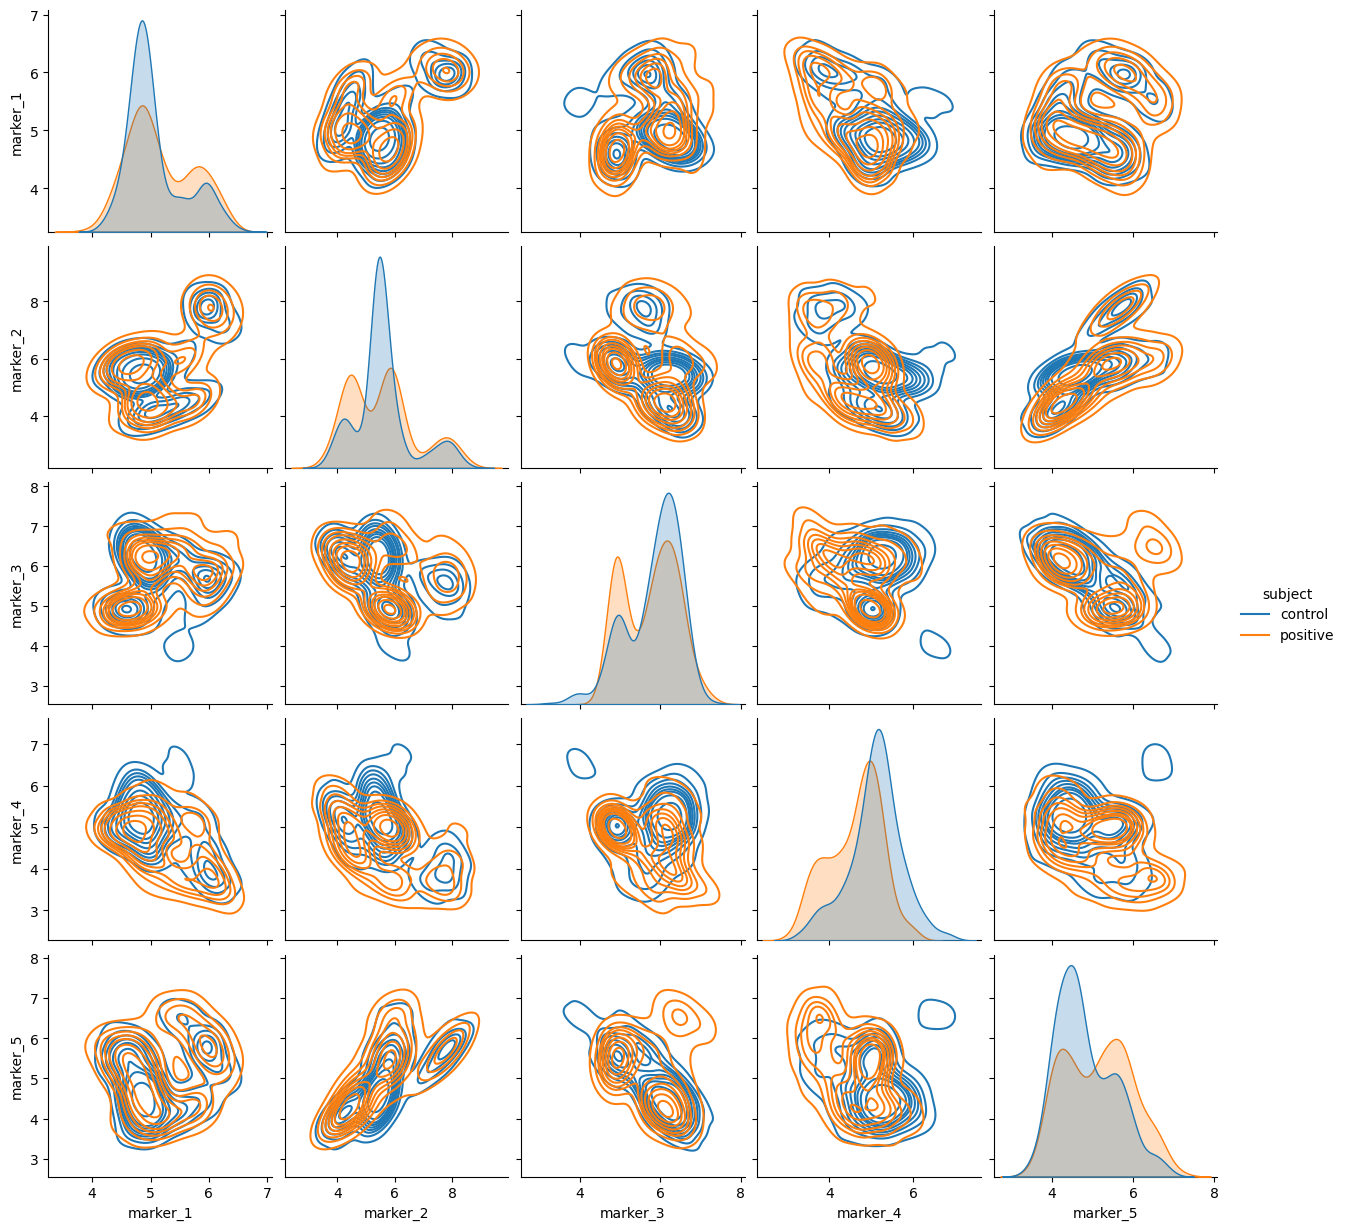

In [16]:

markers = cyto_adata.var_names.to_list()

obs = cyto_adata.obs.sample(1_000, random_state=19)
sub_adata = cyto_adata[obs.index, markers]
df = sub_adata.to_df()
df["subject"] = sub_adata.obs["subject"]

plot_marker_pairplot(sub_adata, markers=markers, kind="kde")
plt.savefig(here("artifacts/figures/pairplot.pdf"), bbox_inches="tight")

# t-SNE Embedding

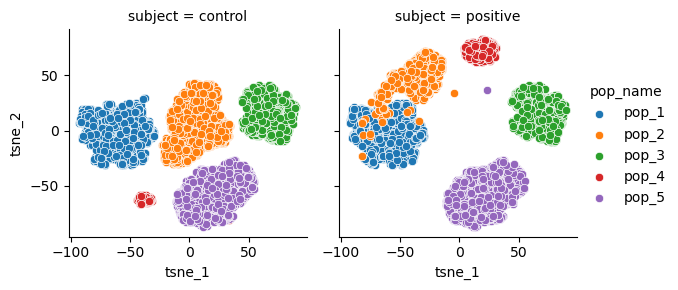

In [22]:
tsne_df = plot_shared_tsne_grid(cyto_adata, col="subject", hue="pop_name", col_wrap=2, n_jobs=8)
plt.savefig(here("artifacts/figures/tsne.png"), bbox_inches="tight", dpi=300)